<img width="10%" alt="Naas" src="https://landen.imgix.net/jtci2pxwjczr/assets/5ice39g4.png?w=160"/>

# Advertools - Bulk status code checker with response headers

**Tags:** #advertools #adviz #website #analyze #audit #seo #status_code #response_headers

**Author:** [Elias Dabbas](https://www.linkedin.com/in/eliasdabbas/)

**Description:** This notebook runs an automated status code checker with response headers using the HTTP `HEAD` method.

* Bulk and concurrent checking of status codes for a known list of URLs
* Get all available response headers from all URLs
* Set speed, number of concurent request and various other crawling options
* Does NOT download the full HTML of a page, saving a lot of time, energy, and resources, and enabling an extreemely fast and light process

**References:**
- [advertools `crawl_headers` function](https://advertools.readthedocs.io/en/master/advertools.header_spider.html)
- Scrapy [throttling](https://docs.scrapy.org/en/latest/topics/autothrottle.html) and [custom settings](https://docs.scrapy.org/en/latest/topics/settings.html)

## Input

### Import libraries

In [ ]:
try:
    import advertools as adv
    import adviz
    import pandas as pd
    import plotly.express as px
    pd.options.display.max_columns = None
except ModuleNotFoundError:
    !pip install adviz

### Setup Variables

**Function parameters:**
- `url_list`: List of URLs to check the status codes
- `output_file`: The path to the file for saving the output. It has to be in the `.jl` format. Note that new lines to the file are `appended` to the end and the file is not overwritten while crawling.

**Custom settings:**

- `CONCURRENT_REQUESTS_PER_DOMAIN`: Defaults to 8. Most likely you will need to slow it down, because the crawling is extremely fast.
- `DEFAULT_REQUEST_HEADERS`: A dictionary where you can set custom request headers.
- `USER_AGENT`: Set a different/custom user agent if you need to.
- `AUTOTHROTTLE_ENABLED`: Whether or not to dynamically change the pace of crawling to be nice to servers as much as possible. It's usually good to enable this extension, as this type of crawling is extremely fast, often leading to 429 (too many requests code), or being blocked.

### Create helper visualizations

In [ ]:
def ecdf(df, column, template='none', width=None, height=500):
    df = df.sort_values(column)
    df['count below'] = range(len(df))
    df['count above'] = range(len(df)-1, -1, -1)
    df['total count'] = len(df)
    fig = px.ecdf(
        df.dropna(subset=[column]),
        x=column,
        markers=True, lines=False,
        template=template,
        height=height,
        width=width,
        hover_data=['count below', 'count above', 'total count'],
        title=f"Cumulative distribution of <b>{column.replace('_', ' ')}</b>",
        ecdfnorm='percent')
    fig.data[0].hovertemplate = f'<b>{column.replace("_", " ").title()}</b><br><br>{column}' + ': %{x}<br>percent: %{y}<br><br>count below: %{customdata[0]:,}<br>count above: %{customdata[1]:,}<br>total count: %{customdata[2]:,}<extra></extra>'
    fig.layout.yaxis.ticksuffix = '%'
    fig.layout.yaxis.showspikes = True
    fig.layout.xaxis.showspikes = True
    return fig

### Convert the website's XML sitemap to a `DataFrame`

Optionally get any other list of URLs hrough crawling, or any analytics tool.

In [ ]:
sitemap = adv.sitemap_to_df('https://www.maven.com/robots.txt')

2023-05-31 14:37:38,624 | INFO | sitemaps.py:536 | sitemap_to_df | Getting https://maven.com/sitemap.xml


In [ ]:
url_list = sitemap['loc']  # or another list of URLs

output_file = 'crawl_headers_output.jl'

custom_settings = {
    # optionally change request headers:
    # 'DEFAULT_REQUEST_HEADERS': {},
    'AUTOTHROTTLE_ENABLED': True,
    'CONCURRENT_REQUESTS_PER_DOMAIN': 4,
    'USER_AGENT': adv.spider.user_agent,
    'LOG_FILE': 'crawl_headers_output.log',
}
custom_settings

{'AUTOTHROTTLE_ENABLED': True,
 'CONCURRENT_REQUESTS_PER_DOMAIN': 4,
 'USER_AGENT': 'advertools/0.13.2',
 'LOG_FILE': 'crawl_headers_output.log'}

## Model

### Check status codes and retreive response headers for `url_list`

In [ ]:
adv.crawl_headers(
    url_list=url_list,
    output_file=output_file,
    custom_settings=custom_settings
)

Open the crawl output file:

In [ ]:
headers_df = pd.read_json('crawl_headers_output.jl', lines=True)
headers_df

,url,crawl_time,status,download_timeout,download_slot,download_latency,depth,protocol,body,resp_headers_content-length,resp_headers_access-control-allow-origin,resp_headers_age,resp_headers_cache-control,resp_headers_content-disposition,resp_headers_content-encoding,resp_headers_content-security-policy,resp_headers_content-type,resp_headers_date,resp_headers_etag,resp_headers_server,resp_headers_set-cookie,resp_headers_strict-transport-security,resp_headers_x-matched-path,resp_headers_x-vercel-cache,resp_headers_x-vercel-id,request_headers_accept,request_headers_accept-language,request_headers_user-agent,request_headers_accept-encoding,request_headers_cookie,resp_headers_x-powered-by,resp_headers_x-nextjs-matched-path,redirect_times,redirect_ttl,redirect_urls,redirect_reasons,resp_headers_x-lambda-id,resp_headers_accept-ranges,resp_headers_x-served-by,resp_headers_x-cache,resp_headers_x-cache-hits,resp_headers_x-timer,resp_headers_vary,resp_headers_x-cluster-name
0,https://maven.com/terms,2023-06-04 22:41:05,200,180,maven.com,0.127141,0,HTTP/1.1,NaN,0,*,5675,"public, max-age=0, must-revalidate","inline; filename=""terms""",gzip,frame-ancestors 'self'; object-src 'none';,text/html; charset=utf-8,"Sun, 04 Jun 2023 22:41:05 GMT","W/""4e2897677cdabbffa62aeaaef35094c9""",Vercel,countryCode=DE; Path=/,max-age=63072000,/terms,HIT,fra1::2pmkm-1685918465201-773d438cf470,"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8",en,advertools/0.13.2,"gzip, deflate",countryCode=DE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://maven.com/about,2023-06-04 22:41:05,200,180,maven.com,0.135604,0,HTTP/1.1,NaN,0,*,151629,"public, max-age=0, must-revalidate","inline; filename=""about""",gzip,frame-ancestors 'self'; object-src 'none';,text/html; charset=utf-8,"Sun, 04 Jun 2023 22:41:05 GMT","W/""983604f5444686e38b0622825a8655b6""",Vercel,countryCode=DE; Path=/,max-age=63072000,/about,HIT,fra1::hvtsj-1685918465200-24451eeb0506,"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8",en,advertools/0.13.2,"gzip, deflate",countryCode=DE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://maven.com/privacy,2023-06-04 22:41:05,200,180,maven.com,0.138744,0,HTTP/1.1,NaN,0,*,179276,"public, max-age=0, must-revalidate","inline; filename=""privacy""",gzip,frame-ancestors 'self'; object-src 'none';,text/html; charset=utf-8,"Sun, 04 Jun 2023 22:41:05 GMT","W/""7fc56e01f7273ef1929e30f08765de3f""",Vercel,countryCode=DE; Path=/,max-age=63072000,/privacy,HIT,fra1::sjqnk-1685918465201-31f7516882d5,"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8",en,advertools/0.13.2,"gzip, deflate",countryCode=DE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://maven.com/teach,2023-06-04 22:41:05,200,180,maven.com,0.169096,0,HTTP/1.1,NaN,0,*,180096,"public, max-age=0, must-revalidate","inline; filename=""teach""",gzip,frame-ancestors 'self'; object-src 'none';,text/html; charset=utf-8,"Sun, 04 Jun 2023 22:41:05 GMT","W/""5f86aef4ab999185c49dd68da4fd4ba7""",Vercel,countryCode=DE; Path=/,max-age=63072000,/teach,HIT,fra1::5vwk6-1685918465201-c06ca5c68725,"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8",en,advertools/0.13.2,"gzip, deflate",countryCode=DE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://maven.com/,2023-06-04 22:41:05,200,180,maven.com,0.261652,0,HTTP/1.1,NaN,0,*,180173,"public, max-age=0, must-revalidate",inline,gzip,frame-ancestors 'self'; object-src 'none';,text/html; charset=utf-8,"Sun, 04 Jun 2023 22:41:05 GMT","W/""32f9687437623c4b4e6cd2eae8fd64db""",Vercel,countryCode=DE; Path=/,max-age=63072000,/,STALE,fra1::fqwxg-1685918465135-bd91b15970e6,"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8",en,advertools/0.13.2,"gzip, deflate",countryCode=DE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

#### Visualize status codes

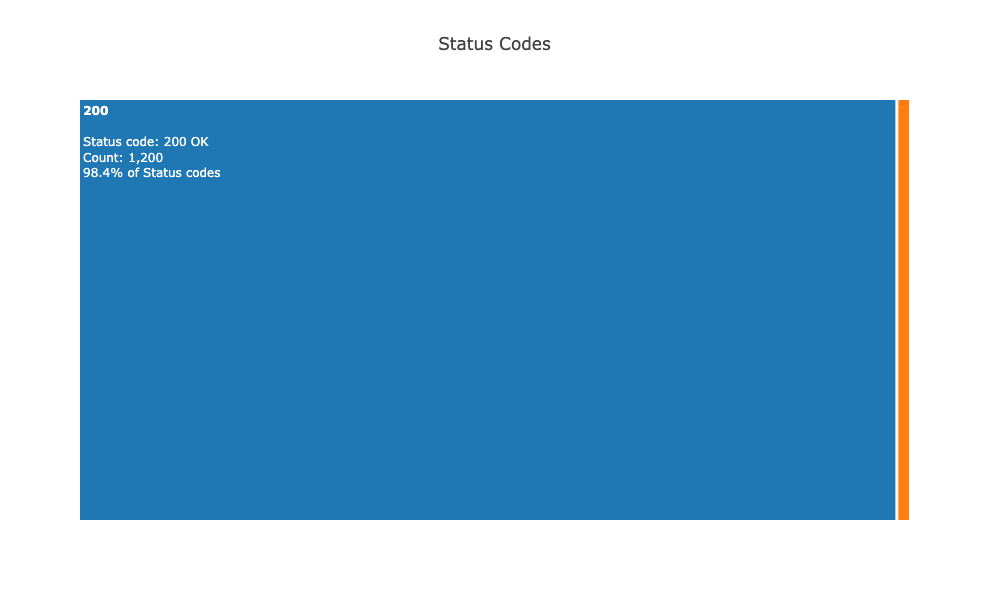

In [ ]:
adviz.status_codes(headers_df['status'])

In [ ]:
adviz.value_counts_plus(headers_df['status'], name='Status codes', size=14)

,Status codes,count,cum. count,%,cum. %
1,200,"1,200","1,200",98.4%,98.4%
2,404,20,"1,220",1.6%,100.0%


#### Visualize URL structure

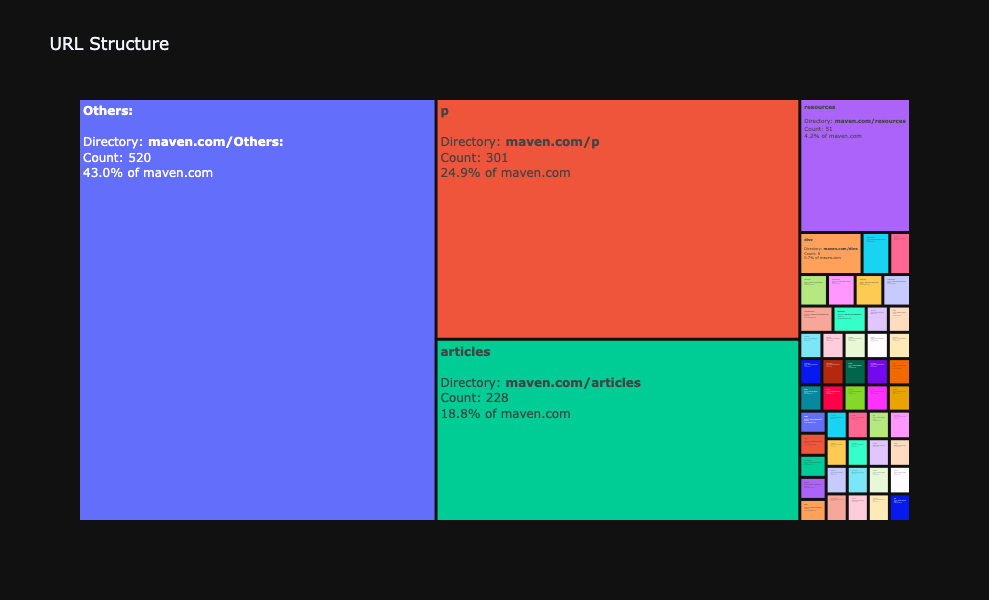

In [ ]:
adviz.url_structure(
    headers_df['url'],
    domain='maven.com',
    items_per_level=50,
    theme='plotly_dark')

#### Get redirects

In [ ]:
if 'redirect_urls' in headers_df:
    redirect_df = headers_df.filter(regex='^url$|redirect_').dropna(thresh=4)
    redirect_df['redirect_urls'] = redirect_df['redirect_urls'].str.split('@@')
    redirect_df['redirect_reasons'] = redirect_df['redirect_reasons'].astype(int).astype(str).str.split('@@')
    redirect_df['redirect_chain'] = (redirect_df['redirect_urls']
                                     .str.join('@@')
                                     .add('@@')
                                     .add(redirect_df['url']).str.split('@@'))
    from IPython.display import display
    display(redirect_df)
else:
    print('No redirects found in this dataset')

,url,redirect_times,redirect_ttl,redirect_urls,redirect_reasons,redirect_chain
780,https://www.thecryptoacademy.io,1.0,19.0,[https://maven.com/pomp/pomps-crypto-course],[307],"[https://maven.com/pomp/pomps-crypto-course, https://www.thecryptoacademy.io]"
782,https://creatorsmba.com/partnerships,1.0,19.0,[https://maven.com/sachit/creatorsmba],[307],"[https://maven.com/sachit/creatorsmba, https://creatorsmba.com/partnerships]"


### Visualize download latency
The same charts can be used for any other `float` columns in `headers_df` if available.

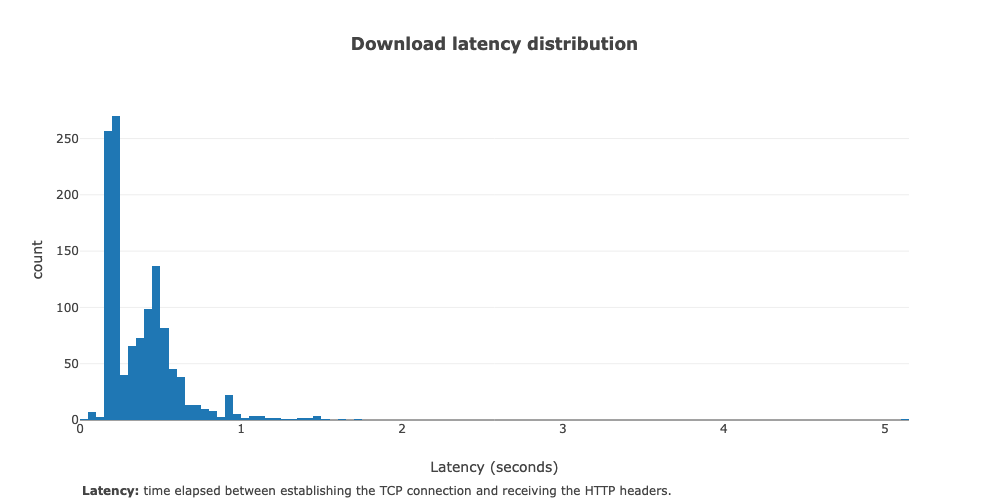

In [ ]:
fig = px.histogram(
    x=headers_df['download_latency'],
    template='none',
    labels={'x': 'Latency (seconds)<br>'},
    height=500,
    # experiment with different values for nbins:
    # nbins=10,
    title='<b>Download latency distribution</b>')

fig.add_annotation(
    yref='y domain',
    xref='paper',
    x=0,
    y=-0.25,
    showarrow=False,
    align='right',
    text='<b>Latency:</b> time elapsed between establishing the TCP connection and receiving the HTTP headers.')
fig

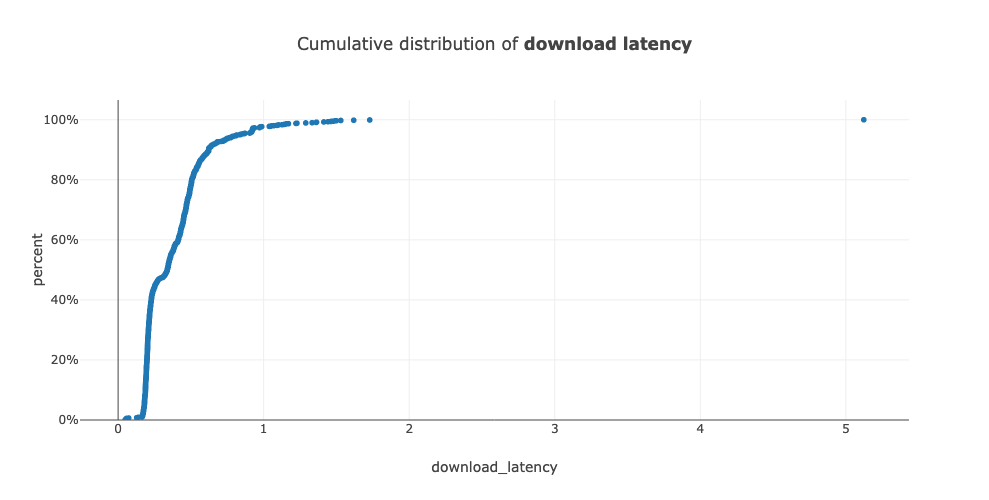

In [ ]:
ecdf(df=headers_df, column='download_latency')

## Output

In [ ]:
headers_df

,url,crawl_time,status,download_timeout,download_slot,download_latency,depth,protocol,body,resp_headers_content-length,resp_headers_access-control-allow-origin,resp_headers_age,resp_headers_cache-control,resp_headers_content-disposition,resp_headers_content-encoding,resp_headers_content-security-policy,resp_headers_content-type,resp_headers_date,resp_headers_etag,resp_headers_server,resp_headers_set-cookie,resp_headers_strict-transport-security,resp_headers_x-matched-path,resp_headers_x-vercel-cache,resp_headers_x-vercel-id,request_headers_accept,request_headers_accept-language,request_headers_user-agent,request_headers_accept-encoding,request_headers_cookie,resp_headers_x-powered-by,resp_headers_x-nextjs-matched-path,redirect_times,redirect_ttl,redirect_urls,redirect_reasons,resp_headers_x-lambda-id,resp_headers_accept-ranges,resp_headers_x-served-by,resp_headers_x-cache,resp_headers_x-cache-hits,resp_headers_x-timer,resp_headers_vary,resp_headers_x-cluster-name
0,https://maven.com/terms,2023-06-04 22:41:05,200,180,maven.com,0.127141,0,HTTP/1.1,NaN,0,*,5675,"public, max-age=0, must-revalidate","inline; filename=""terms""",gzip,frame-ancestors 'self'; object-src 'none';,text/html; charset=utf-8,"Sun, 04 Jun 2023 22:41:05 GMT","W/""4e2897677cdabbffa62aeaaef35094c9""",Vercel,countryCode=DE; Path=/,max-age=63072000,/terms,HIT,fra1::2pmkm-1685918465201-773d438cf470,"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8",en,advertools/0.13.2,"gzip, deflate",countryCode=DE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://maven.com/about,2023-06-04 22:41:05,200,180,maven.com,0.135604,0,HTTP/1.1,NaN,0,*,151629,"public, max-age=0, must-revalidate","inline; filename=""about""",gzip,frame-ancestors 'self'; object-src 'none';,text/html; charset=utf-8,"Sun, 04 Jun 2023 22:41:05 GMT","W/""983604f5444686e38b0622825a8655b6""",Vercel,countryCode=DE; Path=/,max-age=63072000,/about,HIT,fra1::hvtsj-1685918465200-24451eeb0506,"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8",en,advertools/0.13.2,"gzip, deflate",countryCode=DE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://maven.com/privacy,2023-06-04 22:41:05,200,180,maven.com,0.138744,0,HTTP/1.1,NaN,0,*,179276,"public, max-age=0, must-revalidate","inline; filename=""privacy""",gzip,frame-ancestors 'self'; object-src 'none';,text/html; charset=utf-8,"Sun, 04 Jun 2023 22:41:05 GMT","W/""7fc56e01f7273ef1929e30f08765de3f""",Vercel,countryCode=DE; Path=/,max-age=63072000,/privacy,HIT,fra1::sjqnk-1685918465201-31f7516882d5,"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8",en,advertools/0.13.2,"gzip, deflate",countryCode=DE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://maven.com/teach,2023-06-04 22:41:05,200,180,maven.com,0.169096,0,HTTP/1.1,NaN,0,*,180096,"public, max-age=0, must-revalidate","inline; filename=""teach""",gzip,frame-ancestors 'self'; object-src 'none';,text/html; charset=utf-8,"Sun, 04 Jun 2023 22:41:05 GMT","W/""5f86aef4ab999185c49dd68da4fd4ba7""",Vercel,countryCode=DE; Path=/,max-age=63072000,/teach,HIT,fra1::5vwk6-1685918465201-c06ca5c68725,"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8",en,advertools/0.13.2,"gzip, deflate",countryCode=DE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://maven.com/,2023-06-04 22:41:05,200,180,maven.com,0.261652,0,HTTP/1.1,NaN,0,*,180173,"public, max-age=0, must-revalidate",inline,gzip,frame-ancestors 'self'; object-src 'none';,text/html; charset=utf-8,"Sun, 04 Jun 2023 22:41:05 GMT","W/""32f9687437623c4b4e6cd2eae8fd64db""",Vercel,countryCode=DE; Path=/,max-age=63072000,/,STALE,fra1::fqwxg-1685918465135-bd91b15970e6,"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8",en,advertools/0.13.2,"gzip, deflate",countryCode=DE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..